Task 3

>>> Генерація даних вручну (Numpy)...


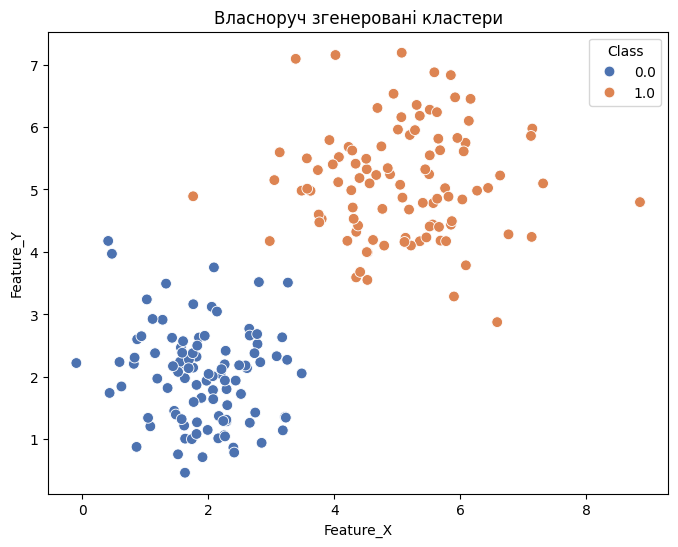


--- Результати (Numpy Manual Data) ---
Accuracy: 1.0000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



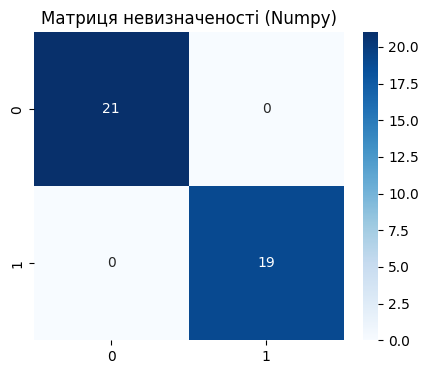

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# === КРОК 1: Генерація даних засобами Numpy ===
print(">>> Генерація даних вручну (Numpy)...")
np.random.seed(42)

# Генеруємо Клас 0 (Хмара точок навколо координат 2,2)
# 100 точок
class_0_x = np.random.normal(loc=2, scale=0.8, size=100)
class_0_y = np.random.normal(loc=2, scale=0.8, size=100)
labels_0 = np.zeros(100) # Мітка 0

# Генеруємо Клас 1 (Хмара точок навколо координат 5,5)
class_1_x = np.random.normal(loc=5, scale=1.0, size=100)
class_1_y = np.random.normal(loc=5, scale=1.0, size=100)
labels_1 = np.ones(100) # Мітка 1

# Об'єднуємо в один масив
X_feat1 = np.concatenate([class_0_x, class_1_x])
X_feat2 = np.concatenate([class_0_y, class_1_y])
y = np.concatenate([labels_0, labels_1])

# Створюємо DataFrame
df_numpy = pd.DataFrame({'Feature_X': X_feat1, 'Feature_Y': X_feat2, 'Class': y})

# Візуалізація наших даних
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numpy, x='Feature_X', y='Feature_Y', hue='Class', palette='deep', s=60)
plt.title('Власноруч згенеровані кластери')
plt.show()

# === КРОК 2: Моделювання (KNN) ===
X = df_numpy[['Feature_X', 'Feature_Y']]
y = df_numpy['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Використовуємо KNN (Метод найближчих сусідів), він гарно працює з геометричними кластерами
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# === КРОК 3: Оцінка ===
print("\n--- Результати (Numpy Manual Data) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Матриця невизначеності
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Матриця невизначеності (Numpy)')
plt.show()